In [24]:
import pandas as pd
import numpy as np
from  sklearn.datasets import make_blobs
import matplotlib.pyplot as plt 
%matplotlib inline

In [25]:
X, y = make_blobs(n_samples=1000,centers=3,n_features= 2,random_state = 23)

In [26]:
X.shape

(1000, 2)

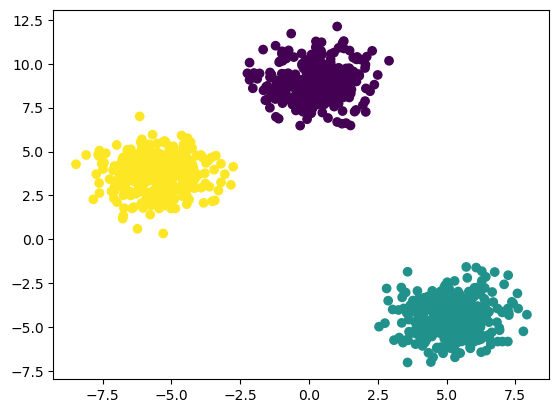

In [27]:
plt.scatter(X[:,0],X[:,1],c =y)

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size = 0.33,random_state = 42)

In [29]:
from sklearn.cluster import KMeans

In [32]:
# Manual Process 
# Elbow Mehtod to select the K value 

wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k , init= 'k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

In [33]:
wcss

[34827.57682552021,
 7935.437286145417,
 1319.2730531585607,
 1140.4677884655125,
 992.0708509383511,
 855.0640194099556,
 761.2519210569783,
 665.6574966227179,
 579.7827637845203,
 531.3086092998951]

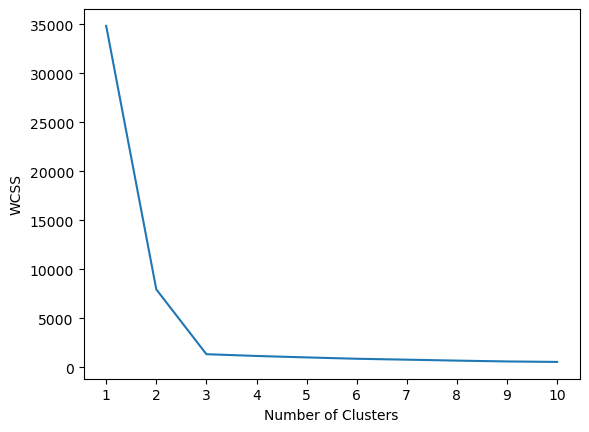

In [38]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()


In [49]:
y_test_labels=kmeans.predict(X_test)

In [50]:
kmeans = KMeans(n_clusters=3,init="k-means++")

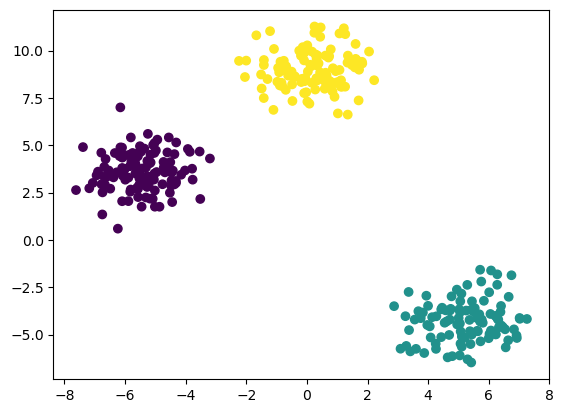

In [52]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test_labels)

In [53]:
y_labels = kmeans.fit_predict(X_train)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


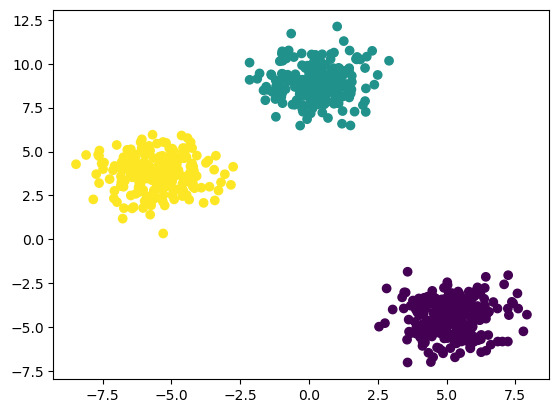

In [54]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_labels)

In [55]:
# knee locater 
!pip install kneed

In [56]:
from kneed import KneeLocator

In [59]:
kl = KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
kl.elbow

3

In [61]:
# performance Metrics
# silhoutte metrics
from sklearn.metrics import silhouette_score

In [62]:
silhouette_coefficients= []

for k in range(2,11):
    kmeans = KMeans(n_clusters = k , init= 'k-means++')
    kmeans.fit(X_train)
    score = silhouette_score(X_train,kmeans.labels_)
    silhouette_coefficients.append(score)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

In [63]:
silhouette_coefficients

[0.7281443868598331,
 0.8071181203797672,
 0.6357733426488265,
 0.48113741589905623,
 0.3399458243818151,
 0.33426653053270744,
 0.3358277171084523,
 0.34455506475285536,
 0.34250746514849767]

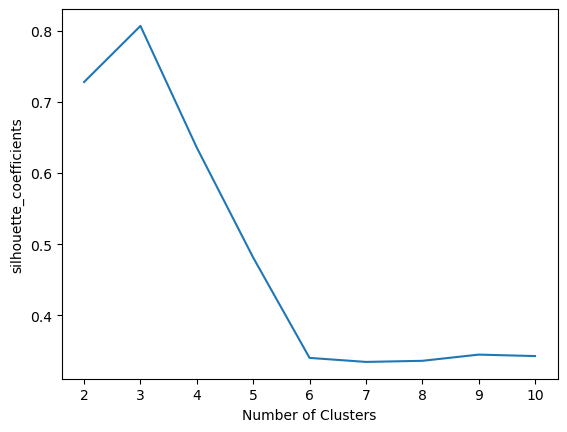

In [64]:
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("silhouette_coefficients")
plt.show()
